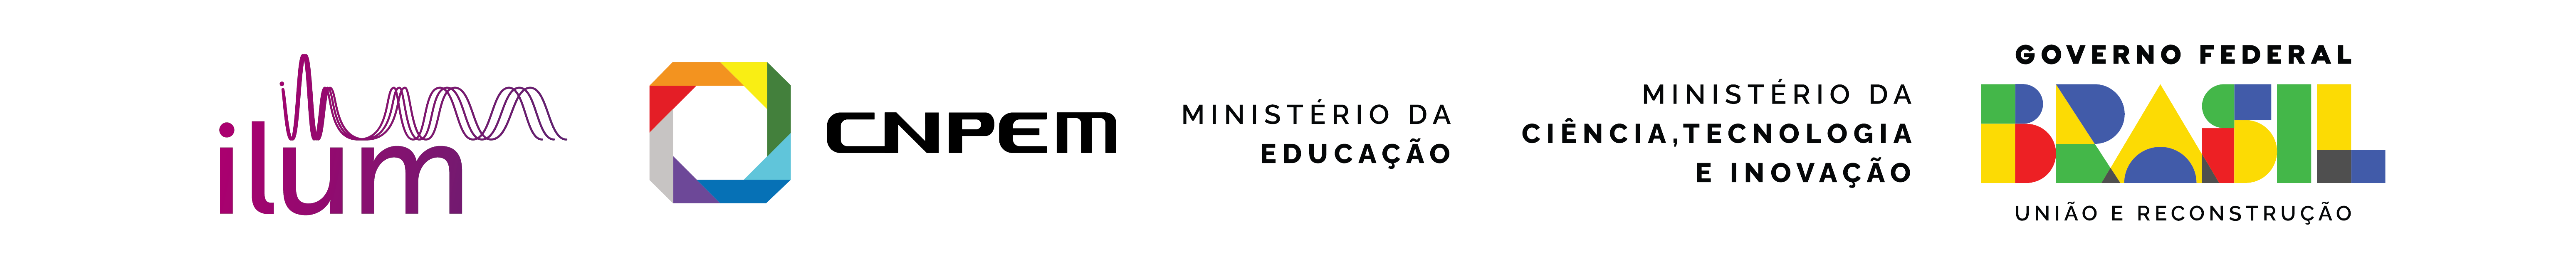

## <center> PREVISÃO DO TEMPO DE SÍNTESE DE MOF's <br><br> Split de Dados 🎲✂️ </center>

Projeto final da disciplina `Aprendizado de Máquina` do 2° período do Bacharelado em `Ciência e Tecnologia` da *Ilum Escola de Ciência (Centro Nacional de Pesquisa em Energia e Materiais)*.

<b> Professor: </b> Daniel Cassar<br>
<b> Semestre: </b> 2024.2 <br>
<b> Turma: </b> 2024 <br>
<b> Grupo: </b> 6 - Arautos da Crepúsculo <br>
<b> Integrantes: </b> Feérica Lyra (*Letícia Nunes*), Mística Luz (*Rafaela Luz*) e Druida Thomaleq (*Thomas Hannemann*) <br>

---

### Bibliotecas

In [1]:
import pandas as pd

# Para o split
from sklearn.model_selection import train_test_split

SEMENTE_ALEATORIA = 84920

### Sumário

1. Introdução
2. Carregando os dados
3. Realizando o split
4. Conclusão
5. Referências

---

## 1. Introdução

O dataset escolhido pode ser encontrado [aqui](https://www.kaggle.com/datasets/marquis03/metal-organic-frame-materials-prediction). O arquivo utilizado nesse projeto é `RAC_train.csv`, visto que nosso objetivo definido é encontrar o valor aproximado para o tempo (target) dadas as outras informações (atributos).

Iremos, neste caderno, separar 10% dos dados do DataFrame `RAC_train` para avaliar nosso modelo, depois de treiná-lo com o restante. Essa abordagem é conhecida como **estratégia de holdout**, a grande vantagem dela é que podemos testar nossos modelos com dados que ele nunca viu.

> Mas, por que realizar o split de treino e teste, se na própria fonte já há arquivos separados entre treino e teste? (No caso, `RAC_train` e `RAC_test`)

Por incrível que pareça, os dados nesses arquivos não são condizentes! Por exemplo, o nosso target - a coluna `time` - não está presente em `RAC_test`, e, por isso, não será viável sua utilização. Não sabemos exatamente o porquê disso, mas uma hipótese é que, como se trata de um dataset para competições, eles não poderiam avaliar a performance, apenas os jurados. 

## 2. Carregando os Dados

In [2]:
df = pd.read_csv('RAC_train.csv')
df

,mof,ASA [m^2/cm^3],CellV [A^3],Df,Di,Dif,NASA [m^2/cm^3],POAV [cm^3/g],POAVF,PONAV [cm^3/g],...,solvent1,solvent2,solvent3,additive,param1,param2,param3,param4,param5,additive_category
0,QUHMOX_clean,0.00,2449.58,3.20914,4.58402,4.58402,143.541,0.000000,0.00000,0.036248,...,679,0,0,284,0.189590,0.332505,-0.110283,-0.350300,0.586608,2
1,VOLPET_clean,2359.68,4070.64,6.24705,9.30216,9.30149,0.000,0.934072,0.69306,0.000000,...,6228,6342,0,0,0.054899,0.332505,0.389717,-0.020010,-0.059007,1
2,XUHVON_clean,0.00,2499.00,3.20904,4.66393,4.65334,603.909,0.000000,0.00000,0.297950,...,702,0,0,0,0.191143,0.332505,0.889717,0.040564,-0.304783,1
3,KIDDOS_clean,0.00,4315.92,3.52628,5.19880,5.19880,707.042,0.000000,0.00000,0.218235,...,6228,0,0,0,0.073993,0.332505,-0.110283,-0.089079,0.295377,1
4,FURFOP_clean,0.00,2316.27,3.56519,4.93892,4.93892,685.582,0.000000,0.00000,0.212321,...,31374,0,0,0,0.210237,0.332505,0.389717,-0.027583,0.044372,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,MAYKOO_clean,1918.59,11245.60,11.50288,12.58218,12.56968,0.000,1.157320,0.69822,0.000000,...,962,31275,6228,313,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,2
533,ADASEF_clean,1817.36,40224.70,10.92309,21.62414,17.61491,0.000,1.883260,0.82036,0.000000,...,6228,0,0,0,0.073993,0.332505,-0.110283,-0.089079,0.295377,1
534,KUQWIE_clean,0.00,2393.79,3.51453,4.08788,4.08434,128.677,0.000000,0.00000,0.047668,...,962,0,0,3301,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,0
535,WONBAD_clean,1727.14,2107.04,4.23427,5.26924,4.80256,0.000,0.252112,0.47918,0.000000,...,6228,0,0,0,0.073993,0.332505,-0.110283,-0.089079,0.295377,1


## 3. Realizando o split

Utilizaremos o `train_test_split` do módulo SciKit-Learn para realizar o split.

In [3]:
TAMANHO_TESTE = 0.1
 
indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)
 
df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

Pronto! Agora podemos conferir se está tudo certo.

In [4]:
df_treino

,mof,ASA [m^2/cm^3],CellV [A^3],Df,Di,Dif,NASA [m^2/cm^3],POAV [cm^3/g],POAVF,PONAV [cm^3/g],...,solvent1,solvent2,solvent3,additive,param1,param2,param3,param4,param5,additive_category
403,XUGWAZ_clean,0.000,2319.05,3.32075,4.92003,4.91922,203.896,0.000000,0.00000,0.088660,...,962,0,0,0,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,1
379,GUJREK_clean,828.075,6571.98,6.09535,6.69718,6.69718,11.020,0.204783,0.25316,0.010225,...,962,6342,0,0,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,1
198,NAGQOD_clean,775.965,6463.87,5.78841,7.52321,7.52321,0.000,0.209919,0.24432,0.000000,...,962,0,0,0,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,1
168,WOPHIU_clean,0.000,8086.64,2.96147,4.36935,4.35185,169.040,0.000000,0.00000,0.048060,...,962,6228,0,0,-0.031351,-0.000828,-0.110283,-0.003003,0.082884,1
161,OMUSAS_clean,1216.690,45709.90,16.17316,18.71438,18.71102,0.000,2.559980,0.81408,0.000000,...,6228,887,0,0,0.073993,0.332505,-0.110283,-0.089079,0.295377,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,BAZFUF_clean,1851.390,20733.20,8.58384,20.24597,20.24597,0.000,2.468850,0.83954,0.000000,...,1049,6228,13387,0,0.329100,0.332505,0.389717,-0.144065,-0.210254,1
329,ZOFZIF_clean,2514.360,9516.34,5.82761,8.07986,8.06722,0.000,0.964974,0.67776,0.000000,...,6228,0,0,176,0.054899,0.332505,0.389717,-0.020010,-0.059007,2
327,USORUR_clean,2379.080,5385.89,5.44409,6.75938,6.68952,0.000,0.801205,0.62268,0.000000,...,962,0,0,0,0.042814,0.110283,0.223050,0.012134,-0.049825,1
184,EBUREA_clean,998.235,2033.35,4.43835,5.12157,5.12005,0.000,0.240780,0.31590,0.000000,...,962,0,0,0,0.042814,0.110283,0.223050,0.011519,-0.046339,1


In [5]:
df_teste

,mof,ASA [m^2/cm^3],CellV [A^3],Df,Di,Dif,NASA [m^2/cm^3],POAV [cm^3/g],POAVF,PONAV [cm^3/g],...,solvent1,solvent2,solvent3,additive,param1,param2,param3,param4,param5,additive_category
244,AROFAP_clean,1138.540,3565.410,4.30595,6.18036,6.18036,0.000000,0.336076,0.39320,0.000000,...,962,6228,0,0,-0.031351,-0.000828,-0.110283,-0.003003,0.082884,1
115,ZOFZUR_clean,2238.010,29351.200,10.75924,12.72726,12.72726,0.000000,1.236260,0.69904,0.000000,...,6228,0,0,944,0.073993,0.332505,-0.110283,-0.089079,0.295377,2
492,EBATUZ_clean,2311.780,15113.600,7.03158,12.21806,12.21806,0.000000,1.239050,0.73940,0.000000,...,6228,0,0,28118,0.073993,0.332505,-0.110283,-0.089079,0.295377,2
109,QOJKAB_clean,1539.180,3169.540,4.09157,5.80501,5.47990,0.000000,0.434687,0.50668,0.000000,...,962,0,0,0,0.133002,-0.000828,-0.110283,-0.221661,-0.203520,1
443,EXOTOB_clean,1717.320,19549.900,7.77882,13.28738,13.22247,0.000000,0.838581,0.59570,0.000000,...,962,887,0,0,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,1
209,VALVAI_clean,992.474,3384.960,4.86854,6.23826,6.23826,0.000000,0.204278,0.33608,0.000000,...,962,6228,0,0,0.075008,-0.000828,-0.110283,-0.011075,0.280792,1
185,DEJCEB_clean,0.000,5590.160,2.81125,4.68460,4.66897,625.705000,0.000000,0.00000,0.199088,...,702,6228,0,0,0.191143,0.332505,0.889717,0.040564,-0.304783,1
165,ASUKEE01_clean,0.000,13312.000,3.45398,4.79531,4.62079,214.439000,0.000000,0.00000,0.116332,...,962,0,0,0,-0.136695,-0.334161,-0.110283,0.083073,-0.129610,1
344,FIJCUX01_clean,1403.650,4548.200,6.13055,7.34002,7.33722,0.000000,0.377157,0.46136,0.000000,...,12051,0,0,0,0.384669,0.332505,-0.110283,-0.105014,0.494090,1
14,ALIXOJ_clean,1802.640,3224.330,5.01976,7.86030,7.84665,0.000000,0.523783,0.51322,0.000000,...,962,6228,0,0,-0.031351,-0.000828,-0.110283,-0.003003,0.082884,1


Estão de acordo, então, podemos salvar os arquivos:

In [6]:
df_treino.to_csv('RAC_treino_split.csv', index = False)
df_teste.to_csv('RAC_teste_split.csv', index = False)

## 4. Conclusão

Definimos assim, os dados de treino e teste que serão utilizados nos cadernos seguintes para todos os modelos e seleção. 

## 5. Referências:
1. <b>Documentação pandas.DataFrame.to_csv</b>: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
2. <b>Otimização com Optuna</b>: ATP-203 4.0 - Split de dados de treino e teste (notebook didático feito por Daniel Cassar)